# Arima
Prof. Fernando Amaral

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime

In [3]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('../../Dados/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

C:\Users\lucas.souza\AppData\Local\Temp\ipykernel_20304\1947005139.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('../../Dados/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)


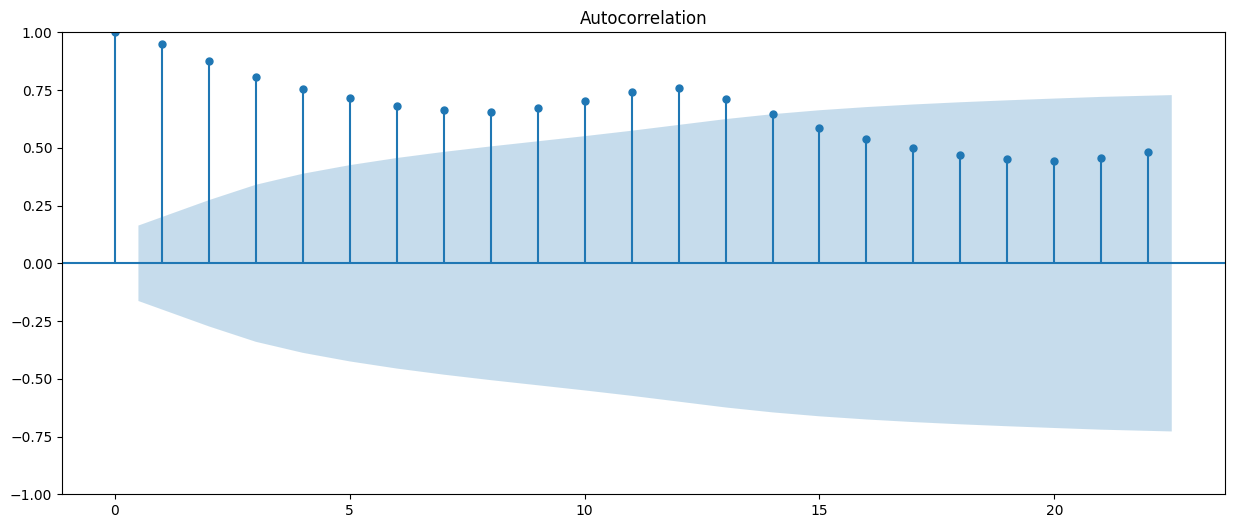

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

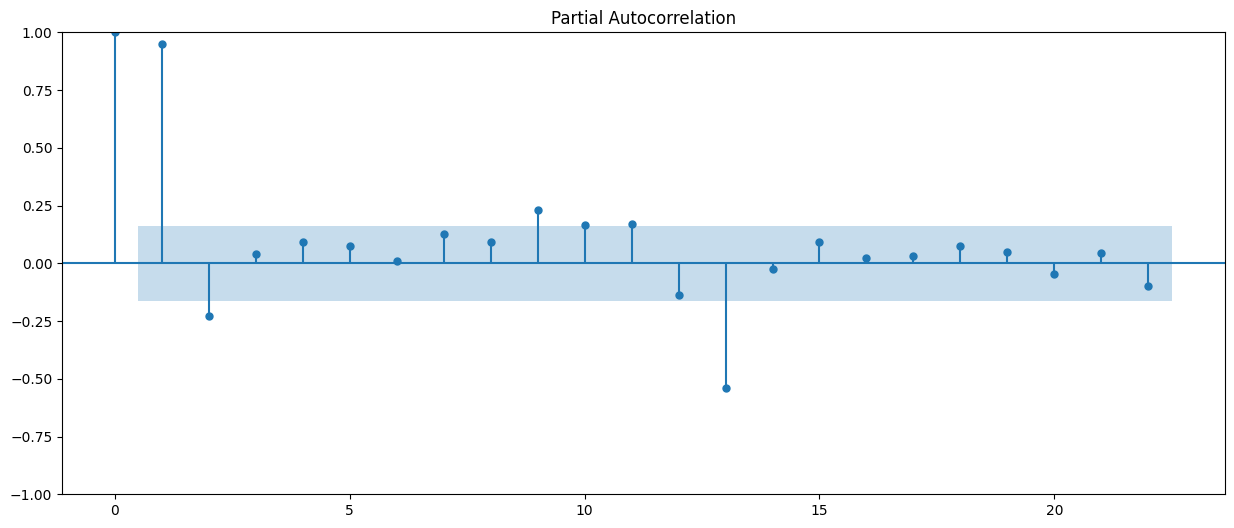

In [5]:
plot_pacf(data, method='ywm')
plt.show()

In [6]:
from statsmodels.tsa.arima.model import ARIMA

In [7]:
data.index.freq = 'MS'
model = ARIMA(data, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -685.169
Date:                Fri, 20 Jun 2025   AIC                           1378.338
Time:                        21:35:07   BIC                           1390.190
Sample:                    01-01-1949   HQIC                          1383.154
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0907      0.083     13.190      0.000       0.929       1.253
ar.L2         -0.4890      0.097     -5.046      0.000      -0.679      -0.299
ma.L1         -0.8439      0.073    -11.486      0.0

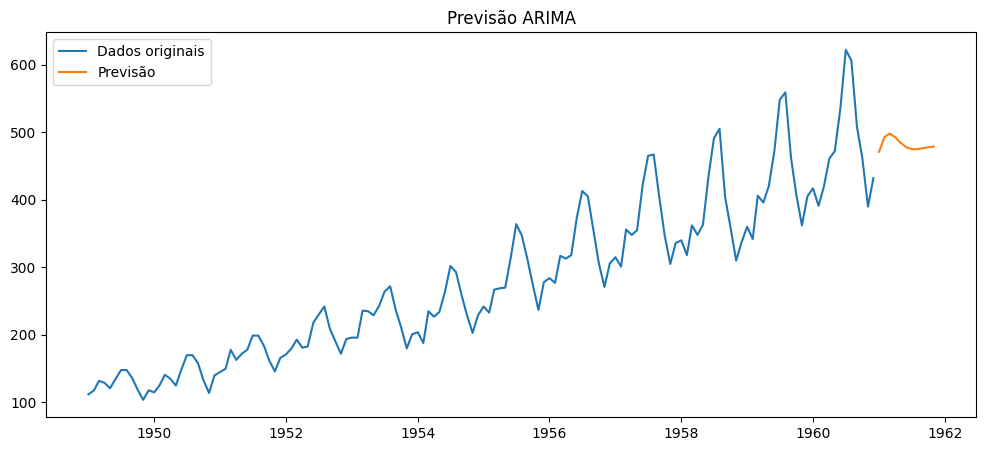

In [8]:
n_periods = 12
forecast = model_fit.forecast(steps=n_periods)
idx = pd.date_range(data.index[-1], periods=n_periods, freq='MS')
forecast_series = pd.Series(forecast, index=idx)
plt.figure(figsize=(12, 5))
plt.plot(data, label='Dados originais')
plt.plot(forecast_series, label='Previsão')
plt.title('Previsão ARIMA')
plt.legend()
plt.show()

# ARIMA sazonal

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data, order=(0, 1, 1), seasonal_order=(2, 1, 0, 12))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                         #Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 20 Jun 2025   AIC                           1019.178
Time:                                     21:35:57   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

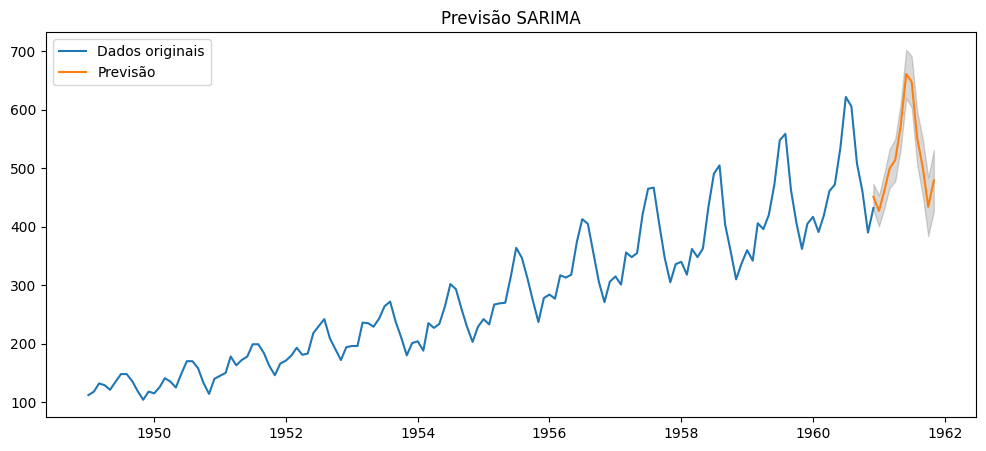

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
n_periods = 12
forecast_results = model_fit.get_forecast(steps=n_periods)
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()
idx = pd.date_range(data.index[-1], periods=n_periods, freq='MS')
plt.figure(figsize=(12, 5))
plt.plot(data, label='Dados originais')
plt.plot(idx, forecast, label='Previsão')
plt.fill_between(idx, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=.15)
plt.title('Previsão SARIMA')
plt.legend()
plt.show()